# **Recommedtion System Using Amazon Reviews**

<a id="data_acquisition"></a>
## 2. Data Acquisition

### Import Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# Split
from sklearn.model_selection import train_test_split

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162998 sha256=a089fefa1a750f56b3f468f4c0d59d2d8d50422ca6b732ba884f928e691682c9
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


### Load Dataset

In [5]:
df = pd.read_csv("ratings_Electronics (1).csv",
                             names=['userId', 'productId','rating','timestamp'])

<a id="eda"></a>
## 3. EDA

In [78]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1.365811e+09
1,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
2,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
3,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
4,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09


In [79]:
print("Total Reviews:",df.shape[0])
print("Total Columns:",df.shape[1])

Total Reviews: 5000
Total Columns: 4


In [80]:
# Taking subset of the dataset
df = df.iloc[:5000,0:]

In [81]:
print("Total Reviews:",df.shape[0])
print("Total Columns:",df.shape[1])

Total Reviews: 5000
Total Columns: 4


In [82]:
print("Total number of ratings :",df.rating.nunique())
print("Total number of users   :", df.userId.nunique())
print("Total number of products  :", df.productId.nunique())

Total number of ratings : 5
Total number of users   : 4929
Total number of products  : 299


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     5000 non-null   object 
 1   productId  5000 non-null   object 
 2   rating     5000 non-null   float64
 3   timestamp  5000 non-null   float64
dtypes: float64(2), object(2)
memory usage: 156.4+ KB


In [84]:
# Check missing value
df.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [85]:
# Check Duplicate data
df[df.duplicated()].any()

userId       False
productId    False
rating       False
timestamp    False
dtype: bool

In [86]:
# rating describe summary
df.describe()['rating']

count    5000.000000
mean        3.986600
std         1.411814
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [87]:
print("Unique value of Rating:",df.rating.unique())

Unique value of Rating: [5. 1. 3. 2. 4.]


In [88]:
# Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df.rating.min()))
print('Maximum rating is: %d' %(df.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


### 3.1 Data Visualization

In [89]:
# Average rating of products
ratings = pd.DataFrame(df.groupby('productId')['rating'].mean())
ratings['ratings_count'] = pd.DataFrame(df.groupby('productId')['rating'].count())
ratings['ratings_average'] = pd.DataFrame(df.groupby('productId')['rating'].mean())
ratings.head(10)

,rating,ratings_count,ratings_average
productId,,,
0132793040,5.000000,1,5.000000
0321732944,5.000000,1,5.000000
0439886341,1.666667,3,1.666667
0511189877,4.500000,6,4.500000
0528881469,2.851852,27,2.851852
0558835155,3.000000,1,3.000000
059400232X,5.000000,3,5.000000
0594012015,2.000000,8,2.000000
0594017343,1.000000,1,1.000000


<Axes: >

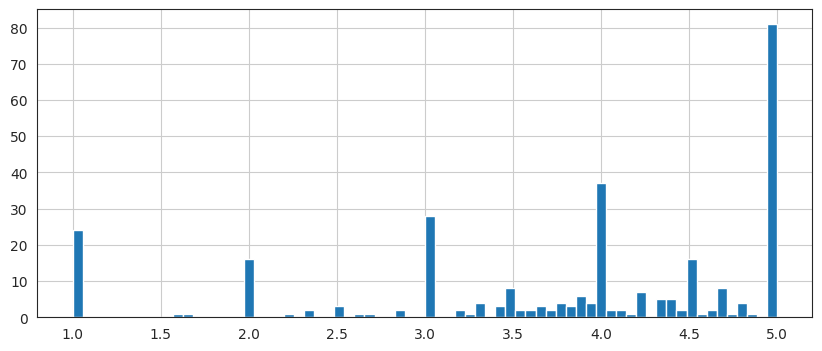

In [90]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

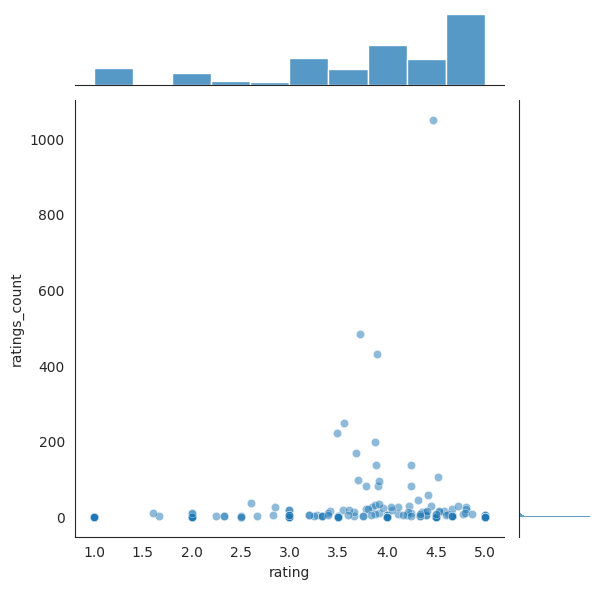

In [91]:
sns.jointplot(x='rating',y='ratings_count',data=ratings,alpha=0.5)

<Axes: xlabel='productId'>

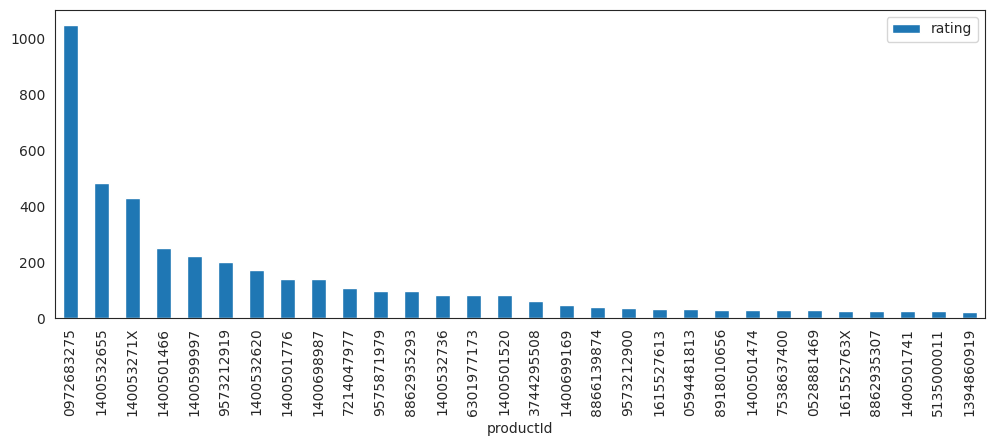

In [92]:
# Most top 30 products
popular_products = pd.DataFrame(df.groupby('productId')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar",figsize=(12, 4))

### 3. Collaborative Filtering






In [93]:
reader = Reader()

In [94]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1.365811e+09
1,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
2,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
3,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
4,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09


In [95]:
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

In [96]:
# Use the famous SVD algorithm
svd = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3726  1.4016  1.3476  1.3167  1.3648  1.3607  0.0281  
MAE (testset)     1.1140  1.1311  1.0892  1.0726  1.1071  1.1028  0.0202  
Fit time          0.07    0.12    0.11    0.11    0.11    0.11    0.02    
Test time         0.27    0.01    0.01    0.01    0.01    0.06    0.10    


{'test_rmse': array([1.372551  , 1.40163678, 1.34759871, 1.31667617, 1.3647939 ]),
 'test_mae': array([1.11404386, 1.13113672, 1.08918737, 1.07255387, 1.10705438]),
 'fit_time': (0.06661653518676758,
  0.11905574798583984,
  0.11359357833862305,
  0.11310553550720215,
  0.11264514923095703),
 'test_time': (0.2673773765563965,
  0.0072977542877197266,
  0.007641792297363281,
  0.0072841644287109375,
  0.007292985916137695)}

<div align='left'><font size="3" color="#000000">From these results, the mean Root Mean Square Error is not good for our case, this happens due to several factors such as lack of training data because we only apply 5000 data. Now let's train our dataset and make some predictions.
</font></div>

In [97]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [98]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1.365811e+09
1,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
2,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
3,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
4,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09


In [99]:
df['userId'].value_counts()

userId
A3LDPF5FMB782Z    5
A36V8NDDRZYRYO    3
A3E7PG9CHDBICA    3
AOY9SZTMNQWAW     3
A2FHM5FB0BXKGA    3
                 ..
A1W92X1R9QNM2C    1
A1KW4AGRCOIWI2    1
A1B6WHCBJSNO6J    1
A3BEVLI33Q0ZF4    1
A1TYKVIT4FTMRO    1
Name: count, Length: 4929, dtype: int64

In [100]:
# Check specific userId review
df[df['userId'] == 'A3LDPF5FMB782Z']

,userId,productId,rating,timestamp
1310,A3LDPF5FMB782Z,1400501466,5.0,1.336003e+09
1588,A3LDPF5FMB782Z,1400501520,5.0,1.362874e+09
1696,A3LDPF5FMB782Z,1400501776,5.0,1.334102e+09
2502,A3LDPF5FMB782Z,140053271X,4.0,1.310515e+09
3235,A3LDPF5FMB782Z,1400698987,4.0,1.392854e+09


In [101]:
# predict based on this data
svd.predict('A3LDPF5FMB782Z', '140053271X', 5.0)

Prediction(uid='A3LDPF5FMB782Z', iid='140053271X', r_ui=5.0, est=4.1049616887247025, details={'was_impossible': False})